# Machine Learning Project - Heart Disease 
### K-Nearest Neighbors

**Dataset:**
http://archive.ics.uci.edu/ml/datasets/heart+Disease

**Objective:** Predict heart disease in patients.

## Step 1: EDA
First, I load and preview the data.

In [1]:
#Import packages

# pandas
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

In [2]:
# Load and preview the data

data = pd.read_csv('heart.disease.data.clean.csv')
data.head(10)

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50.0,20.0,1,1,2,150,0,6,0
1,67,1,4,160,286,40.0,40.0,0,1,2,108,1,3,2
2,67,1,4,120,229,20.0,35.0,0,1,2,129,1,7,1
3,37,1,3,130,250,0.0,0.0,0,1,0,187,0,3,0
4,41,0,2,130,204,0.0,0.0,0,1,2,172,0,3,0
5,56,1,2,120,236,20.0,20.0,0,1,0,178,0,3,0
6,62,0,4,140,268,0.0,0.0,0,1,2,160,0,3,3
7,57,0,4,120,354,0.0,0.0,0,1,0,163,1,3,0
8,63,1,4,130,254,0.0,0.0,0,0,2,147,0,7,2
9,53,1,4,140,203,20.0,25.0,1,1,2,155,1,7,1


#### Begin EDA

In [104]:
#Brief overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   cigs      282 non-null    float64
 6   years     282 non-null    float64
 7   fbs       282 non-null    int64  
 8   famhist   282 non-null    int64  
 9   restecg   282 non-null    int64  
 10  thalach   282 non-null    int64  
 11  exang     282 non-null    int64  
 12  thal      282 non-null    int64  
 13  num       282 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 31.0 KB


There are 14 numerical attributes and all of the missing data has been dealt with.

In [3]:
# Descriptvie Statistics
data.describe()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.195035,247.705674,16.836011,15.347364,0.148936,0.620567,1.014184,149.826241,0.326241,4.677305,0.907801
std,9.053083,0.468338,0.955405,16.739821,46.178771,18.876755,15.276814,0.356658,0.486108,0.998118,22.737594,0.469670,1.936386,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,11.976385,15.000000,0.000000,1.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,75.000000,54.000000,1.000000,1.000000,2.000000,202.000000,1.000000,7.000000,4.000000


The descriptive statistics show that the mean age is 54 with a range from 29 to 77.  Sex, with a mean of 0.677 is slightly skewwed toward male (coded as 1).  Outliers from last wee have been removed from cigarettes smoekd per day.  The mean is 16.  The years that patients have smoked has a mean of 15 with a standard deviation of 15.  Some patients do not smoke at all (0 years) and some have smoked for upwards of 54 there is a big range.  

After gaining an idea about what the data includes, it will be valuable to look at the relationships amgong the attributes.  To accomplish this, I will create a correlation heat map and look at the specific correlations of the target variable.  

Doing this might allow me to remove some attributes that don't affect the output.

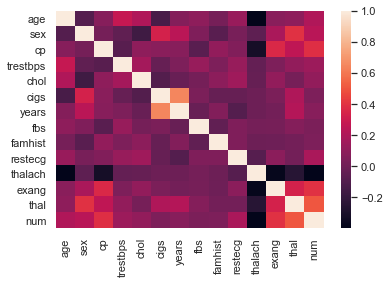

In [4]:
# Correlation
_ = sns.heatmap(data.corr())

# Source: Week 2 Lecture

In [5]:
# Correlation Matrix
corr_matrix = data.corr()

# Correlation of num with the other attributes
corr_matrix["num"].sort_values(ascending=False)

num         1.000000
thal        0.506545
exang       0.398880
cp          0.383891
sex         0.239516
age         0.210747
restecg     0.187365
trestbps    0.144412
chol        0.114023
years       0.077806
famhist     0.048619
cigs        0.046374
fbs         0.039690
thalach    -0.397067
Name: num, dtype: float64

The attributes 'years', 'famhist','cigs',and 'fbs' all have a low correlation with the target variable 'num', so they can be removed, which I will do now.

In [6]:
# trimming our data set
data.drop(['years', 'famhist', 'cigs', 'fbs'],axis=1, inplace=True)
data.head(10)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,thal,num
0,63,1,1,145,233,2,150,0,6,0
1,67,1,4,160,286,2,108,1,3,2
2,67,1,4,120,229,2,129,1,7,1
3,37,1,3,130,250,0,187,0,3,0
4,41,0,2,130,204,2,172,0,3,0
5,56,1,2,120,236,0,178,0,3,0
6,62,0,4,140,268,2,160,0,3,3
7,57,0,4,120,354,0,163,1,3,0
8,63,1,4,130,254,2,147,0,7,2
9,53,1,4,140,203,2,155,1,7,1


Next, I look at outliers by using boxplots.  These plots, by lacking points outside of the candels, demonstrate what I predicted earlier, that outliers have been removed.  It appears that one outlier exists for CP, but that feature is categorical with 1 being a valid answer, there just is only one of them. This value hasn't been removed.

age            AxesSubplot(0.125,0.657941;0.133621x0.222059)
sex         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
cp           AxesSubplot(0.44569,0.657941;0.133621x0.222059)
trestbps    AxesSubplot(0.606034,0.657941;0.133621x0.222059)
chol        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
restecg        AxesSubplot(0.125,0.391471;0.133621x0.222059)
thalach     AxesSubplot(0.285345,0.391471;0.133621x0.222059)
exang        AxesSubplot(0.44569,0.391471;0.133621x0.222059)
thal        AxesSubplot(0.606034,0.391471;0.133621x0.222059)
num         AxesSubplot(0.766379,0.391471;0.133621x0.222059)
dtype: object

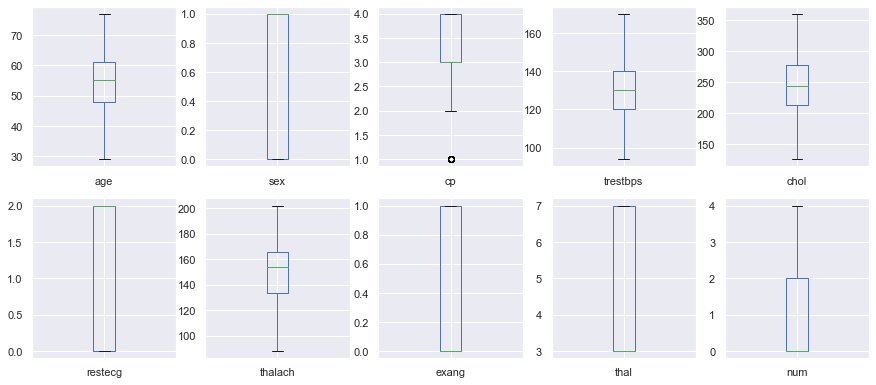

In [7]:
# Plot box plots
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
data.plot(kind='box', subplots=True, layout=(3,5),
sharex=False,sharey=False, figsize=(15, 10))

### EDA Summary

- 14 attributes with 282 entries.  No null cells.  All data is numerical.
- Outliers, such as 99 cigarettes smoked per day, have been removed.
- 'years', 'famhist','cigs','fbs' all have a low correlation with the target variable 'num', so they can be removed.
- Boxplots confirm that outliers have been removed.

## Step 2: Divide data into training and test set and predict based on 1-nearest neighbor.

In [8]:
# Get list of column names
cols = data.columns
# Define target column
target_col = 'num'
# Add columns to feature columns as long as column is not target
feat_cols = [c for c in cols if c != target_col]

# separate features into X and target values into Y
X = data[feat_cols].values
Y = data[target_col].values

# Source: Week 2 Lecture

In [9]:
# Split data into train and test sets.  Use 80-20 ratio of train to test.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Source: Week 2 Lecture

(225, 9)
(57, 9)
(225,)
(57,)


In [10]:
# define and fit our model with 1-nearest neighbor
# model used is KNeighborsClassifier

# Source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
model.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# EValuate Model
# Source: Week 2 Lecture and https://stackoverflow.com/questions/15821116/how-to-measure-the-accuracy-of-knn-classifier-in-python
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

print('R-squared: ',r2_score(y_test,preds))

print('Accuracy: ',accuracy_score(y_test, preds))


R-squared:  -0.1974050046339202
Accuracy:  0.3508771929824561


The negative R-Squared shows that the model fits the data very poorly, and that an arbitrary horizontal line would do a better job of classification.

The accuracy score of 35% means that 35% of predictions were right.  This implies an error rate of 65%.

Reference to R-Squared:
https://stats.stackexchange.com/questions/183265/what-does-negative-r-squared-mean

In [11]:
# Create Confusion matrix from resluts
#Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[19,  6,  2,  2,  0],
       [ 8,  0,  0,  1,  0],
       [ 1,  2,  0,  2,  0],
       [ 3,  2,  3,  0,  1],
       [ 2,  1,  1,  0,  1]], dtype=int64)

The confusion matrix shows what data values are classified as vs. what they actually are.

Rules of thumb for reading the matrix are:
- X axis labels: What They Are
- Y axis lables: What They Were classified as

In this dataset, the classes are 0, 1, 2, 3, and 4.

So, for example, the top row of the confusion matrix shows that:
- 19 0s were classified as 0s
- 6 1s were classified as 0s
- 2 2s were classified as 0s
- 2 3s were classified as 0s
- 0 4s were classified as 0s

And so on down the list.  This model did not do very well, evidenced by the 35% Accuracy rate (65% error rate).  Also, 19 0s were classified correctly, but only one other datapoint was classified correctly - one 4 was classified as a 4. This is how the accuracy rate is calculated: 20 correct predictions out of 57 total predictions made = 35%.

Reference To Understand Confusion Matrix:
https://machinelearningmastery.com/confusion-matrix-machine-learning/

## Step 3: Find optimal value for K

* Use different values for K, what is the optimal value of K from your experiments? Report the error rate of the optimal K value and its confusion matrix. Is there any improvement (by how much) over 1-nearest neighbor?

In [114]:
scores = []

for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores.append(accuracy_score(y_test, preds))
    
scores

#Source: Week 2 Lecture (With personal modifications)

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


[0.38596491228070173,
 0.43859649122807015,
 0.43859649122807015,
 0.47368421052631576,
 0.45614035087719296,
 0.47368421052631576,
 0.45614035087719296,
 0.49122807017543857,
 0.49122807017543857,
 0.47368421052631576,
 0.47368421052631576,
 0.49122807017543857,
 0.49122807017543857,
 0.5087719298245614,
 0.5087719298245614,
 0.5087719298245614,
 0.5087719298245614,
 0.5087719298245614]

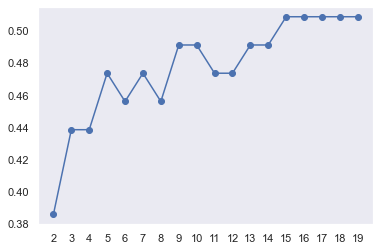

In [115]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

#Source: Week 2 Lecture

Running the model with a range of nearest-neighbors from 2 to 19, it appears that the accuracy score pleateaus when k=15.  This will be the optimal value going forward.  

I run the model and show the confusion matrix for this optimal state below.

In [116]:
# Build model with 15 nearest_neighbors
model = KNeighborsClassifier(n_neighbors=15, n_jobs=-1)
model.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(X_test)

print('R-squared: ',r2_score(y_test,preds))
print('Accuracy: ',accuracy_score(y_test, preds))

R-squared:  -0.3999073215940683
Accuracy:  0.5087719298245614


In [117]:
confusion_matrix(y_test, preds)

array([[29,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  0],
       [ 6,  1,  2,  0,  0],
       [ 4,  1,  0,  0,  0]], dtype=int64)

The confusion matrix shows a higher number of accurate predictions, with 29.  However, all 29 belong to the 0 class.  No other class had any correct predictions.  This is possibly why the R-Squared of -.40 was even more negative than the baseline model above.  The accuracy improved to around 51% from 35%, but is barely better than a random guess each time.  I will try to improve the model below.

## Step 4: Attempt to improve model

### Data Normalization by Feature Scaling

Feature scaling is important so that features with different measurements can be compared in an apples-to-apples manner.  The MinMaxScaler() makes feature scaling straightforward.

However, some of the categorical variables do not need to be scaled.  These features include 'cp', 'restecg', and 'thal'. For these features, I scale the whole dataset and then remove just these features, and replace them with their original, non-scaled values. 

Other categorical variables are binary and are represented the same before and after feature scaling, so I do not remove the scaled versions and replace them with the originals.

In [16]:
from sklearn import preprocessing

# Load in the scaler
min_max_scaler = preprocessing.MinMaxScaler()

# normalize X_train and X_test
X_tr_norm = min_max_scaler.fit_transform(X_train)
#only fit the scaler to the train data, and then transform the test data to those parameters (per Raschka, 2019)
X_te_norm = min_max_scaler.transform(X_test) 

#reconstruct train and test sets
norm_data_tr = pd.DataFrame(X_tr_norm,columns=feat_cols)
norm_data_te = pd.DataFrame(X_te_norm,columns=feat_cols)

# Conver the numpy array into a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=feat_cols)
X_test_df = pd.DataFrame(X_test, columns=feat_cols)

# Remove the normalized features that are categorical and should not be scaled
norm_data_tr.drop(['cp', 'restecg', 'thal'],axis=1, inplace=True)
norm_data_te.drop(['cp', 'restecg', 'thal'],axis=1, inplace=True)

# Add in the non-scaled, original categorical features
norm_data_tr['cp'] = X_train_df['cp']
norm_data_te['cp'] = X_test_df['cp']

norm_data_tr['restecg'] = X_train_df['restecg']
norm_data_te['restecg'] = X_test_df['restecg']

norm_data_tr['thal'] = X_train_df['thal']
norm_data_te['thal'] = X_test_df['thal']

norm_data_tr.head()


# Source: Week 2 Lecture

,age,sex,trestbps,chol,thalach,exang,cp,restecg,thal
0,0.458333,1.0,0.407895,0.508547,0.684211,0.0,3,2,3
1,0.687500,0.0,0.578947,0.717949,0.157895,0.0,4,0,3
2,0.416667,1.0,0.473684,0.598291,0.728070,0.0,2,0,3
3,0.812500,1.0,0.315789,0.645299,0.552632,0.0,3,0,7
4,0.625000,1.0,0.605263,0.405983,0.666667,1.0,2,0,3


Now that the data is scaled, I can find Optimal K value and then run the model with that number for k.

In [17]:
scores = []

for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(norm_data_tr, y_train)
    preds = model.predict(norm_data_te)
    scores.append(accuracy_score(y_test, preds))
    
scores

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


[0.49122807017543857,
 0.5087719298245614,
 0.5263157894736842,
 0.5087719298245614,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.5087719298245614,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.49122807017543857,
 0.47368421052631576]

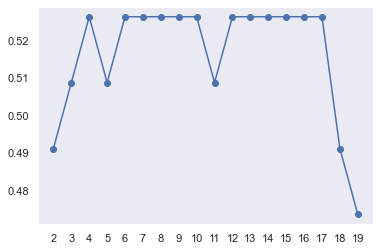

In [18]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

#Source: Week 2 Lecture

A k value of 4 gets the highest score.  I will use that below.

In [19]:
# Build model with 4 nearest_neighbors
model = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
model.fit(norm_data_tr, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(norm_data_te)

print('R-squared: ',r2_score(y_test,preds))
print('Accuracy: ',accuracy_score(y_test, preds))

R-squared:  -0.1269694161260424
Accuracy:  0.5263157894736842


In [20]:
confusion_matrix(y_test, preds)

array([[26,  1,  1,  0,  1],
       [ 4,  2,  0,  3,  0],
       [ 0,  2,  1,  2,  0],
       [ 3,  3,  2,  1,  0],
       [ 2,  1,  1,  1,  0]], dtype=int64)

Data normalization helped improve the model to 52% from 50% and the R-squared improved substantially to -0.12 from -.40.  The confusion matrix shows that 0s are still the most correctly classified.  However, other classes are now classified correctly.

### Keeping all the data instead of dropping low correlated attributes

In another attempt to improve my model, I omit the step were I drop lowly correlated features from the dataset.  Perhaps the model can find some signal in these features, and the dataset isn't too large so that any increase in comuting time will be worth potential improved accuracy.  That is, if the increased time is even perceptible.  

The steps below are similar to above besides dropping features.

In [21]:
data = pd.read_csv('heart.disease.data.clean.csv')
data.head(10)

# Get list of column names
cols = data.columns
# Define target column
target_col = 'num'
# Add columns to feature columns as long as column is not target
feat_cols = [c for c in cols if c != target_col]

# separate features into X and target values into Y
X = data[feat_cols].values
Y = data[target_col].values

# Split data into train and test sets.  Use 80-20 ratio of train to test.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 13)
(57, 13)
(225,)
(57,)


In [22]:
# Load in the scaler
min_max_scaler = preprocessing.MinMaxScaler()

# normalize X_train and X_test
X_tr_norm = min_max_scaler.fit_transform(X_train)
#only fit the scaler to the train data, and then transform the test data to those parameters (per Raschka, 2019)
X_te_norm = min_max_scaler.transform(X_test) 

#reconstruct train and test sets
norm_data_tr = pd.DataFrame(X_tr_norm,columns=feat_cols)
norm_data_te = pd.DataFrame(X_te_norm,columns=feat_cols)

# Conver the numpy array into a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=feat_cols)
X_test_df = pd.DataFrame(X_test, columns=feat_cols)

# Remove the normalized features that are categorical and should not be scaled
norm_data_tr.drop(['cp', 'restecg', 'thal'],axis=1, inplace=True)
norm_data_te.drop(['cp', 'restecg', 'thal'],axis=1, inplace=True)

# Add in the non-scaled, original categorical features
norm_data_tr['cp'] = X_train_df['cp']
norm_data_te['cp'] = X_test_df['cp']

norm_data_tr['restecg'] = X_train_df['restecg']
norm_data_te['restecg'] = X_test_df['restecg']

norm_data_tr['thal'] = X_train_df['thal']
norm_data_te['thal'] = X_test_df['thal']

norm_data_tr.head()

,age,sex,trestbps,chol,cigs,years,fbs,famhist,thalach,exang,cp,restecg,thal
0,0.458333,1.0,0.407895,0.508547,0.000000,0.000000,1.0,0.0,0.684211,0.0,3.0,2.0,3.0
1,0.687500,0.0,0.578947,0.717949,0.266667,0.500000,1.0,1.0,0.157895,0.0,4.0,0.0,3.0
2,0.416667,1.0,0.473684,0.598291,0.333333,0.440000,0.0,0.0,0.728070,0.0,2.0,0.0,3.0
3,0.812500,1.0,0.315789,0.645299,0.026667,0.478785,0.0,0.0,0.552632,0.0,3.0,0.0,7.0
4,0.625000,1.0,0.605263,0.405983,0.266667,0.800000,0.0,1.0,0.666667,1.0,2.0,0.0,3.0


In [23]:
scores = []

for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(norm_data_tr, y_train)
    preds = model.predict(norm_data_te)
    scores.append(accuracy_score(y_test, preds))
    
scores

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


[0.5614035087719298,
 0.5789473684210527,
 0.5263157894736842,
 0.5087719298245614,
 0.543859649122807,
 0.543859649122807,
 0.543859649122807,
 0.5263157894736842,
 0.5087719298245614,
 0.49122807017543857,
 0.49122807017543857,
 0.49122807017543857,
 0.5263157894736842,
 0.5087719298245614,
 0.5087719298245614,
 0.49122807017543857,
 0.49122807017543857,
 0.49122807017543857]

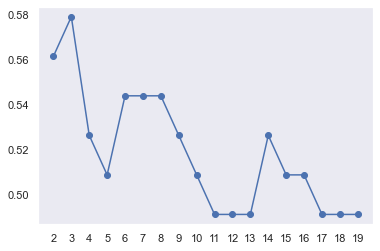

In [24]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

#Source: Week 2 Lecture

A value of 3 for k will get the most accurate result, according to the test and the graph above.  I will use that in fitting the model for the final output.

In [25]:
# Build model with 3 nearest_neighbors
model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(norm_data_tr, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(norm_data_te)

print('R-squared: ',r2_score(y_test,preds))
print('Accuracy: ',accuracy_score(y_test, preds))

R-squared:  -0.030120481927710774
Accuracy:  0.5789473684210527


In [26]:
confusion_matrix(y_test, preds)

array([[27,  1,  0,  0,  1],
       [ 5,  3,  0,  1,  0],
       [ 0,  4,  1,  0,  0],
       [ 2,  2,  3,  2,  0],
       [ 3,  1,  0,  1,  0]], dtype=int64)

Keeping all data features instead of dropping low correlated ones, helped improve the accuracy fairly well (to 58% from 52%) and the R-score (from -0.12 to -0.03), indicating that the model still isn't fitting the data that well. The confusion matrix shows that 0s are still classified correctly more than any of the other options.  And similar to the prior model, some other classes are being classified correctly, but not at a high rate.

### Classifying a 0 or 1

The UCI website mentions that the attribute we are trying to predict ('num') is binary, with value 0 for < 50% diameter narrowing and 1 for > 50% diameter narrowing.  However, our test data lists a range of possible values (0,1,2,3) for 'num', which I assume to be advancing degrees of diameter narrowing.  I have been attempting to classify instances into these various values thus far.  However, if I only want the model to classify greater than or less than 50% diameter narrowing like the dataset website mentions, I can change the 2 and 3 values for 'num' to be 1s.  In doing this, I am assuming that 2 and 3 are just increasing degrees of diameter narrowing, and since they are greater  than 1, then I assume that they are also greater than 50%, and can therefore be seen as similar to 1 and different than 0.  

So below, I change the prediction problem into binary, by making the y_labels either 0 or 1.  The model's accuracy improves significantly.  See below for importing the data, editing the Y_labels as a binary problem, splitting the data, normalizing it, and then fitting the model.

In [27]:
data = pd.read_csv('heart.disease.data.clean.csv')
data.head(10)

# Get list of column names
cols = data.columns
# Define target column
target_col = 'num'
# Add columns to feature columns as long as column is not target
feat_cols = [c for c in cols if c != target_col]

# separate features into X and target values into Y
X = data[feat_cols].values
Y = data[target_col].values

In [28]:
# this step uses list comprehension to change the labels to be either 0 or 1, depending on the criteria that  
# 0s stay 0, and everything else becomes a 1.
import numpy as np
Y = [0 if i==0 else 1 for i in Y]
Y = np.array(Y)

In [29]:
# Split data into train and test sets.  Use 80-20 ratio of train to test.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 13)
(57, 13)
(225,)
(57,)


In [30]:
# Load in the scaler
min_max_scaler = preprocessing.MinMaxScaler()

# normalize X_train and X_test
X_tr_norm = min_max_scaler.fit_transform(X_train)
#only fit the scaler to the train data, and then transform the test data to those parameters (per Raschka, 2019)
X_te_norm = min_max_scaler.transform(X_test) 

#reconstruct train and test sets
norm_data_tr = pd.DataFrame(X_tr_norm,columns=feat_cols)
norm_data_te = pd.DataFrame(X_te_norm,columns=feat_cols)

# Conver the numpy array into a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=feat_cols)
X_test_df = pd.DataFrame(X_test, columns=feat_cols)

# Remove the normalized features that are categorical and should not be scaled
norm_data_tr.drop(['cp', 'restecg', 'thal'],axis=1, inplace=True)
norm_data_te.drop(['cp', 'restecg', 'thal'],axis=1, inplace=True)

# Add in the non-scaled, original categorical features
norm_data_tr['cp'] = X_train_df['cp']
norm_data_te['cp'] = X_test_df['cp']

norm_data_tr['restecg'] = X_train_df['restecg']
norm_data_te['restecg'] = X_test_df['restecg']

norm_data_tr['thal'] = X_train_df['thal']
norm_data_te['thal'] = X_test_df['thal']

norm_data_tr.head()

,age,sex,trestbps,chol,cigs,years,fbs,famhist,thalach,exang,cp,restecg,thal
0,0.458333,1.0,0.407895,0.508547,0.000000,0.000000,1.0,0.0,0.684211,0.0,3.0,2.0,3.0
1,0.687500,0.0,0.578947,0.717949,0.266667,0.500000,1.0,1.0,0.157895,0.0,4.0,0.0,3.0
2,0.416667,1.0,0.473684,0.598291,0.333333,0.440000,0.0,0.0,0.728070,0.0,2.0,0.0,3.0
3,0.812500,1.0,0.315789,0.645299,0.026667,0.478785,0.0,0.0,0.552632,0.0,3.0,0.0,7.0
4,0.625000,1.0,0.605263,0.405983,0.266667,0.800000,0.0,1.0,0.666667,1.0,2.0,0.0,3.0


In [31]:
scores = []

for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(norm_data_tr, y_train)
    preds = model.predict(norm_data_te)
    scores.append(accuracy_score(y_test, preds))
    
scores

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


[0.7368421052631579,
 0.8245614035087719,
 0.7894736842105263,
 0.7894736842105263,
 0.7719298245614035,
 0.7719298245614035,
 0.7894736842105263,
 0.7719298245614035,
 0.7543859649122807,
 0.7719298245614035,
 0.7719298245614035,
 0.7719298245614035,
 0.7719298245614035,
 0.7719298245614035,
 0.7894736842105263,
 0.8070175438596491,
 0.7543859649122807,
 0.7894736842105263]

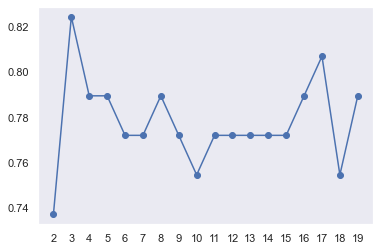

In [32]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

#Source: Week 2 Lecture

The output two cells up as well as the graph directly above shows that setting k = 3 will provide the most accurate model.

In [33]:
# Build model with 3 nearest_neighbors
model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(norm_data_tr, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(norm_data_te)

print('R-squared: ',r2_score(y_test,preds))
print('Accuracy: ',accuracy_score(y_test, preds))

R-squared:  0.2980295566502462
Accuracy:  0.8245614035087719


In [34]:
confusion_matrix(y_test, preds)

array([[25,  4],
       [ 6, 22]], dtype=int64)

Making it a binary problem greatly improved the model's accuracy (82%) and R-squared (0.30) from what I achieved previously.  The confusion matrix is also a lot simpler, as there are less classes to classify.  In this model, with 3 nearest-neighbors, 25 0s were classified correctly, while 4 1s were classified as 0s.  6 0s were classified as 1s while 22 1s were correctly classified. 

In a real-world application, this simpler problem may be more useful.  It would be useful to be able to classify with greater accuracy whether a patient has heart disaese or not, and then if they do, to determine the degree.  This approach may be better than doing both steps in one, as my prior classification models were doing.